# Data Access

In [1]:
api_url = "https://earth-search.aws.element84.com/v0"

In [2]:
from pystac_client import Client

In [3]:
# create client instance 
client = Client.open(api_url)

In [4]:
client 

ID: earth-search
Title: Earth Search
Description: A STAC API of AWS Public Datasets powered by stac-server
stac_api_version: 0.9.0
type: Catalog
ID: sentinel-s2-l2a
Title: Sentinel 2 L2A
"Description: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance)"
Providers: ESA (producer) Sinergise (processor) AWS (host) Element 84 (processor)
stac_extensions: ['https://stac-extensions.github.io/item-assets/v1.0.0/schema.json']
title: Sentinel 2 L2A


In [6]:
collection = "sentinel-s2-l2a-cogs"  # sentinel 2, L2A, COGs 

In [7]:
from shapely.geometry import Point

In [8]:
point = Point(4.89, 52.37)  

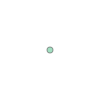

In [9]:
point

In [10]:
search = client.search(
    collections=[collection],
    intersects=point,
    max_items=10,
)

In [11]:
search.matched()

727

In [12]:
items = search.get_all_items() # get the scenes' metadata

In [13]:
items

ID: S2B_31UFU_20221118_0_L2A
"Bounding Box: [4.809433621489353, 52.22257539160586, 6.1417542968794585, 53.228650975069705]"
Datetime: 2022-11-18 10:46:25+00:00
datetime: 2022-11-18T10:46:25Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31


In [14]:
len(items)

10

In [15]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20221118_0_L2A>
<Item id=S2A_31UFU_20221116_0_L2A>
<Item id=S2A_31UFU_20221113_0_L2A>
<Item id=S2B_31UFU_20221111_0_L2A>
<Item id=S2B_31UFU_20221108_0_L2A>
<Item id=S2A_31UFU_20221106_0_L2A>
<Item id=S2A_31UFU_20221103_0_L2A>
<Item id=S2B_31UFU_20221101_0_L2A>
<Item id=S2B_31UFU_20221029_0_L2A>
<Item id=S2A_31UFU_20221027_0_L2A>


In [16]:
item = items[0]

In [17]:
item.datetime

datetime.datetime(2022, 11, 18, 10, 46, 25, tzinfo=tzutc())

In [18]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[6.071664488869862, 52.22257539160586],
   [4.809433621489353, 52.248687929959345],
   [5.23554112567977, 53.228650975069705],
   [6.1417542968794585, 53.20819279121764],
   [6.071664488869862, 52.22257539160586]]]}

In [19]:
item.properties

{'datetime': '2022-11-18T10:46:25Z',
 'platform': 'sentinel-2b',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'gsd': 10,
 'view:off_nadir': 0,
 'proj:epsg': 32631,
 'sentinel:utm_zone': 31,
 'sentinel:latitude_band': 'U',
 'sentinel:grid_square': 'FU',
 'sentinel:sequence': '0',
 'sentinel:product_id': 'S2B_MSIL2A_20221118T104229_N0400_R008_T31UFU_20221118T115218',
 'sentinel:data_coverage': 66.87,
 'eo:cloud_cover': 64.29,
 'sentinel:valid_cloud_cover': True,
 'sentinel:processing_baseline': '04.00',
 'sentinel:boa_offset_applied': True,
 'created': '2022-11-18T15:06:10.116Z',
 'updated': '2022-11-18T15:06:10.116Z'}

In [ ]:
# intersect bounding box
# datetime filter
# cloud cover smaller than x

In [23]:
bbox = point.buffer(0.01).bounds

In [24]:
datetime = "2020-03-20/2020-03-30"

In [25]:
query = "eo:cloud_cover<10"

In [27]:
search_bbox = client.search(
    collections=[collection],
    bbox=bbox,
    datetime=datetime,
    query=[query]
)

In [28]:
search_bbox.matched()

4

In [29]:
items = search_bbox.get_all_items()

In [30]:
len(items)

4

In [31]:
items.save_object("search.json")

In [34]:
point.buffer(0.01).bounds

(4.88, 52.36, 4.8999999999999995, 52.379999999999995)

In [37]:
item = items[0]

In [38]:
assets = item.assets

In [42]:
assets.keys()

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])

In [44]:
for key, asset in assets.items():
    print(key, ": ", asset.title)

thumbnail :  Thumbnail
overview :  True color image
info :  Original JSON metadata
metadata :  Original XML metadata
visual :  True color image
B01 :  Band 1 (coastal)
B02 :  Band 2 (blue)
B03 :  Band 3 (green)
B04 :  Band 4 (red)
B05 :  Band 5
B06 :  Band 6
B07 :  Band 7
B08 :  Band 8 (nir)
B8A :  Band 8A
B09 :  Band 9
B11 :  Band 11 (swir16)
B12 :  Band 12 (swir22)
AOT :  Aerosol Optical Thickness (AOT)
WVP :  Water Vapour (WVP)
SCL :  Scene Classification Map (SCL)


In [45]:
assets["thumbnail"].get_absolute_href()

'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/31/U/FU/2020/3/28/0/preview.jpg'

In [46]:
assets["B01"].get_absolute_href()

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B01.tif'

In [47]:
assets["B01"].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B01.tif'

In [51]:
assets["B01"]

In [53]:
nasa_cmr_api = "https://cmr.earthdata.nasa.gov/stac/LPCLOUD"

In [54]:
client_nasa_cmr = Client.open(nasa_cmr_api)

In [55]:
client_nasa_cmr

<Client id=LPCLOUD>

In [56]:
search = client_nasa_cmr.search(
    collections=["HLSL30.v2.0"],
    datetime="2021-02-01/2021-03-30",
    intersects=Point(-73.97, 40.78),
)

In [57]:
items_nasa_cmr = search.get_all_items()

In [59]:
search.matched()

5

In [66]:
items_nasa_cmr

ID: HLS.L30.T18TWL.2021039T153324.v2.0
"Bounding Box: [-74.392491, 40.555473, -73.6838, 41.548251]"
Datetime: 2021-02-08 15:33:24.028000+00:00
eo:cloud_cover: 6
datetime: 2021-02-08T15:33:24.028Z
start_datetime: 2021-02-08T15:33:24.028Z
end_datetime: 2021-02-08T15:33:47.911Z
stac_extensions: ['https://stac-extensions.github.io/eo/v1.0.0/schema.json']
https://stac-extensions.github.io/eo/v1.0.0/schema.json
href: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B05.tif
Title: Download HLS.L30.T18TWL.2021039T153324.v2.0.B05.tif


In [61]:
item = items_nasa_cmr[0]

In [63]:
item.assets

{'B05': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B05.tif>,
 'B06': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B06.tif>,
 'B01': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B01.tif>,
 'B11': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B11.tif>,
 'B03': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B03.tif>,
 'Fmask': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L

In [65]:
item.assets["browse"].get_absolute_href()

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'

In [68]:
for collection in client_nasa_cmr.get_all_collections():
    print(collection)

<CollectionClient id=ASTGTM.v003>
<CollectionClient id=ECO_L1B_ATT.v002>
<CollectionClient id=ECO_L2_CLOUD.v002>
<CollectionClient id=ECO_L1B_GEO.v002>
<CollectionClient id=ECO_L2_LSTE.v002>
<CollectionClient id=ECO_L1B_RAD.v002>
<CollectionClient id=ECO_L2T_LSTE.v002>
<CollectionClient id=HLSL30.v2.0>
<CollectionClient id=HLSS30.v2.0>
<CollectionClient id=MYD11_L2.v061>
